In this notebook, I would present how to transform multivariate gaussian distribution given specific correlation matrix to multivariate gamma distribution.<br/>
<br/>
You can also compare with the result without correlation in the Appendix.

## Step 1:
## Generate random sample from multivariate Gaussian distribution 

In [54]:
from scipy.stats import multivariate_normal as mvn
r = mvn.rvs(mean=[0,0],cov=[[1,0.5],[0.5,1]],size=10000)
r

array([[-0.54962792,  0.80055415],
       [-1.97158757, -0.31524239],
       [ 0.555936  ,  0.46494492],
       ...,
       [-2.5316757 , -2.10962157],
       [-0.40859229,  0.17994731],
       [-1.18833251, -1.063003  ]])

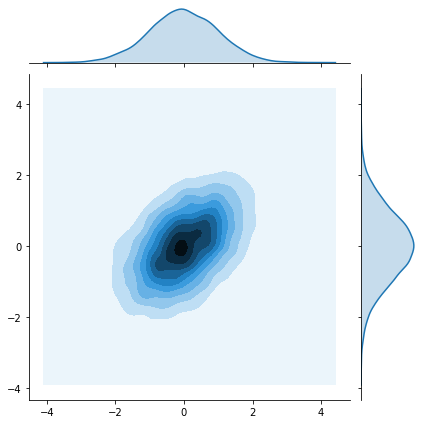

In [75]:
import seaborn as sns
p1 = sns.jointplot(x=r[:,0],y=r[:,1], kind = 'kde')

## Step 2: 
## Transform Gaussian to Uniform

In [56]:
from scipy.stats import norm
t1 = norm.cdf(r[:,0])
t2 = norm.cdf(r[:,1])

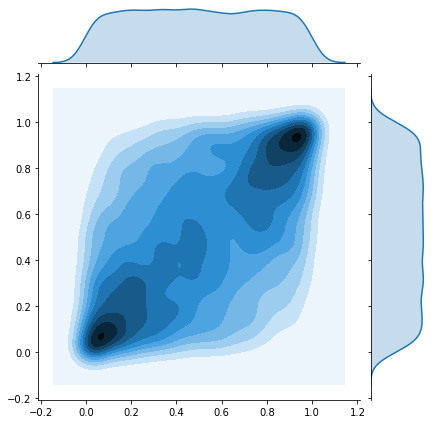

In [76]:
p2 = sns.jointplot(x = t1, y=t2, kind = 'kde')

## Step 3:
## Transform uniform to Gamma

In [73]:
from scipy import stats
g1 = stats.gamma.pdf(t1, a=3, scale=2)
g2 = stats.gamma.pdf(t2, a=3, scale=2)

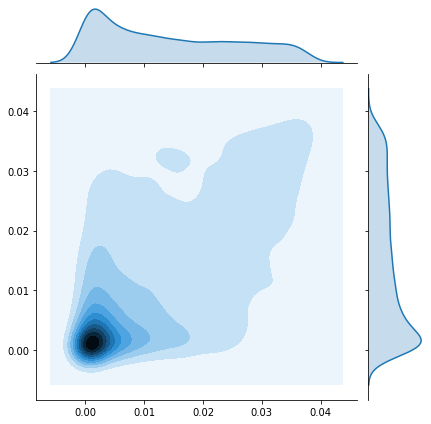

In [77]:
p3 = sns.jointplot(x = g1, y = g2, kind = 'kde')

## Appendix: Compare with distribution without correlation

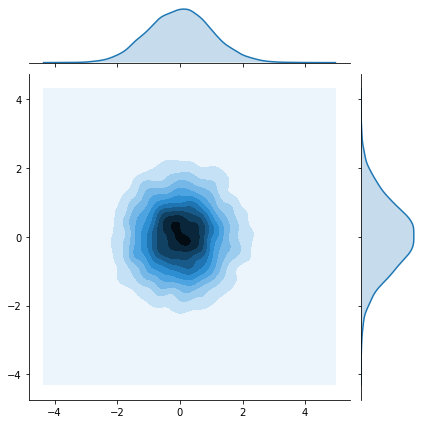

In [7]:
from scipy.stats import multivariate_normal as mvn
import seaborn as sns
from scipy.stats import norm
from scipy import stats

r = mvn.rvs(mean=[0,0],cov=[[1,0],[0,1]],size=10000)
p1 = sns.jointplot(x=r[:,0],y=r[:,1], kind = 'kde')

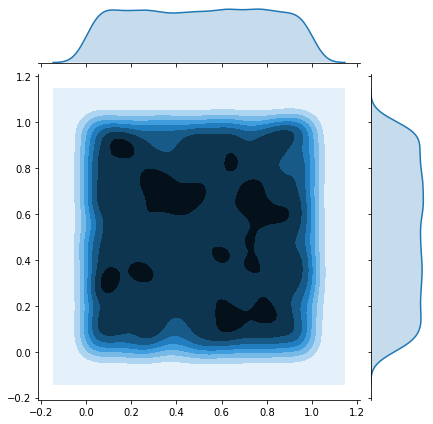

In [8]:
t1 = norm.cdf(r[:,0])
t2 = norm.cdf(r[:,1])
p2 = sns.jointplot(x = t1, y=t2, kind = 'kde')

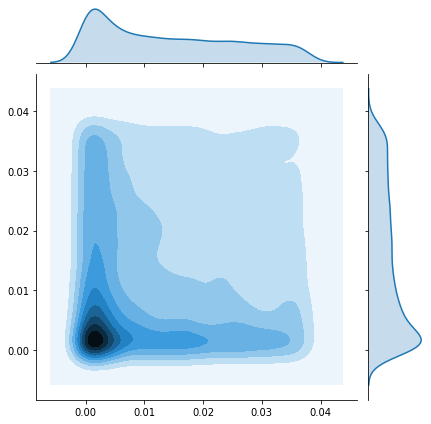

In [9]:
g1 = stats.gamma.pdf(t1, a=3, scale=2)
g2 = stats.gamma.pdf(t2, a=3, scale=2)
p3 = sns.jointplot(x = g1, y = g2, kind = 'kde')